In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
os.chdir(r"C:\Users\User\Downloads\ml")

In [3]:
os.listdir()

['1st model.ipynb',
 '2. Linear Regression (1).pdf',
 'Banks_full.csv',
 'bank_cleaned.csv',
 'covid19_sample.csv',
 'Crop_Recommendation_Model.ipynb',
 'data',
 'DecisionTreeTheory.ipynb',
 'Diabatic-checkpoint.ipynb',
 'Diabatic.ipynb',
 'DiabeticData.zip',
 'Ensemble-checkpoint.ipynb',
 'Ensemble.ipynb',
 'KC house data.ipynb',
 'LinearRegressionCarSales.ipynb',
 'Loan Data linear reg. SAhil (1) (1).ipynb',
 'LogReg_Default.ipynb',
 'Mobile_data.csv',
 'nyc taxi.ipynb',
 'Project 5 car data-checkpoint.ipynb',
 'project work.ipynb',
 'pyplot.rar',
 'sonu Loan Data linear reg. loan data.ipynb',
 'yellow_tripdata_2022-06.parquet']

In [4]:
df=pd.read_csv('Mobile_data.csv')

In [5]:
df.head(5)

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  pc  \
0            842          2.2   1           7    0.6        188        2   2   
1           1021          0.5   0          53    0.7        136        3   6   
2            563          0.5   2          41    0.9        145        5   6   
3            615          2.5   0          10    0.8        131        6   9   
4           1821          1.2  13          44    0.6        141        2  14   

   px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
0         20       756  2549     9     7         19            1  
1        905      1988  2631    17     3          7            2  
2       1263      1716  2603    11     2          9            2  
3       1216      1786  2769    16     8         11            2  
4       1208      1212  1411     8     2         15            1

In [6]:
df["price_range"].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   clock_speed    2000 non-null   float64
 2   fc             2000 non-null   int64  
 3   int_memory     2000 non-null   int64  
 4   m_dep          2000 non-null   float64
 5   mobile_wt      2000 non-null   int64  
 6   n_cores        2000 non-null   int64  
 7   pc             2000 non-null   int64  
 8   px_height      2000 non-null   int64  
 9   px_width       2000 non-null   int64  
 10  ram            2000 non-null   int64  
 11  sc_h           2000 non-null   int64  
 12  sc_w           2000 non-null   int64  
 13  talk_time      2000 non-null   int64  
 14  price_range    2000 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 234.5 KB


### EDA
* UNIVARIATE

In [9]:
def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round( data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.histplot(data[x])
    plt.show()
    sns.boxplot(data=df, y=data[x])
    plt.show()
#     sns.countplot(data=data,x=x)
#     plt.show()
    return myvalue

In [10]:
df.dtypes[df.dtypes!="object"].index

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

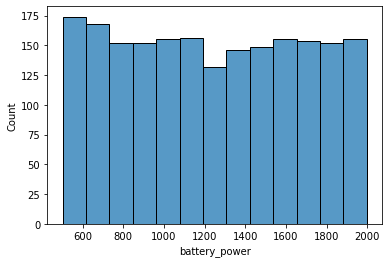

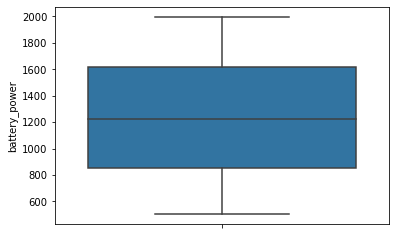

{'missing': 0,
 'min': 501,
 'max': 1998,
 'mean': 1238.52,
 'var': 193088.36,
 'std': 439.42,
 'range': 1497,
 'q1': 851.75,
 'q2': 1226.0,
 'q3': 1615.25,
 'skewness': 0.03,
 'kurtosis': -1.22}

In [11]:
univariate_num(data=df,x='battery_power')

In [12]:
df[df["battery_power"]<=501]

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
625             501          2.3  12          54    0.3        131        4   
1115            501          0.5  14          22    0.5        174        6   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
625   19        504      1089  2346    13    12          2            1  
1115  20        239      1636  3077    17     3         17            2

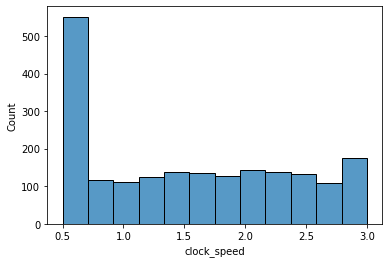

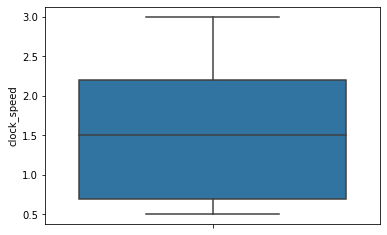

{'missing': 0,
 'min': 0.5,
 'max': 3.0,
 'mean': 1.52,
 'var': 0.67,
 'std': 0.82,
 'range': 2.5,
 'q1': 0.7,
 'q2': 1.5,
 'q3': 2.2,
 'skewness': 0.18,
 'kurtosis': -1.32}

In [13]:
univariate_num(data=df,x='clock_speed')

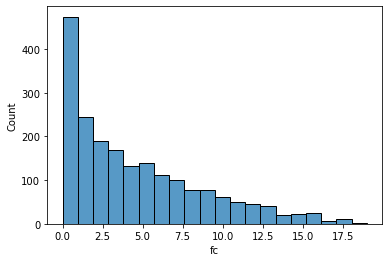

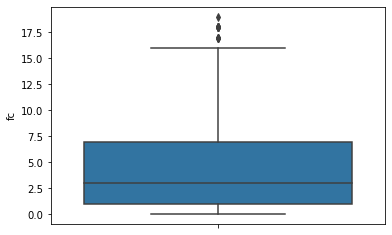

{'missing': 0,
 'min': 0,
 'max': 19,
 'mean': 4.31,
 'var': 18.85,
 'std': 4.34,
 'range': 19,
 'q1': 1.0,
 'q2': 3.0,
 'q3': 7.0,
 'skewness': 1.02,
 'kurtosis': 0.28}

In [14]:
univariate_num(data=df,x='fc')        

In [15]:
df[df["fc"]==0].count()

battery_power    474
clock_speed      474
fc               474
int_memory       474
m_dep            474
mobile_wt        474
n_cores          474
pc               474
px_height        474
px_width         474
ram              474
sc_h             474
sc_w             474
talk_time        474
price_range      474
dtype: int64

* there are 474 mobile which do not have front camara

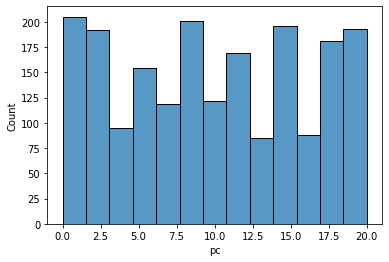

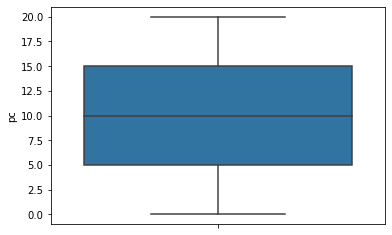

{'missing': 0,
 'min': 0,
 'max': 20,
 'mean': 9.92,
 'var': 36.78,
 'std': 6.06,
 'range': 20,
 'q1': 5.0,
 'q2': 10.0,
 'q3': 15.0,
 'skewness': 0.02,
 'kurtosis': -1.17}

In [16]:
univariate_num(data=df,x="pc")

In [17]:
df[df["pc"]==0].count()

battery_power    101
clock_speed      101
fc               101
int_memory       101
m_dep            101
mobile_wt        101
n_cores          101
pc               101
px_height        101
px_width         101
ram              101
sc_h             101
sc_w             101
talk_time        101
price_range      101
dtype: int64

* there are 101 mobile which do not have primery camara

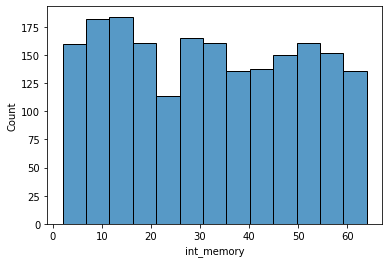

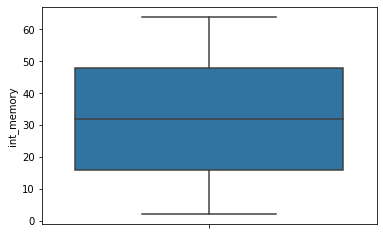

{'missing': 0,
 'min': 2,
 'max': 64,
 'mean': 32.05,
 'var': 329.27,
 'std': 18.15,
 'range': 62,
 'q1': 16.0,
 'q2': 32.0,
 'q3': 48.0,
 'skewness': 0.06,
 'kurtosis': -1.22}

In [18]:
univariate_num(data=df,x='int_memory')

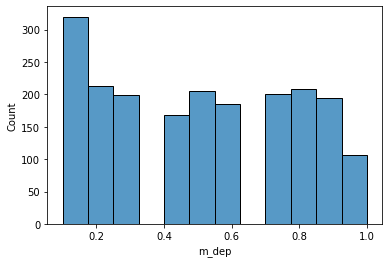

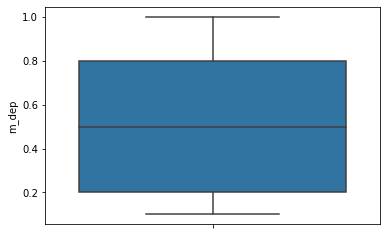

{'missing': 0,
 'min': 0.1,
 'max': 1.0,
 'mean': 0.5,
 'var': 0.08,
 'std': 0.29,
 'range': 0.9,
 'q1': 0.2,
 'q2': 0.5,
 'q3': 0.8,
 'skewness': 0.09,
 'kurtosis': -1.27}

In [19]:
univariate_num(data=df,x="m_dep")

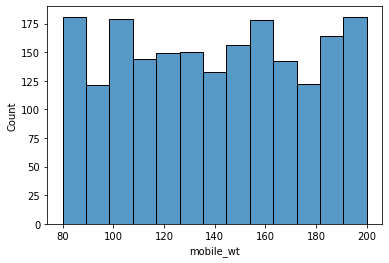

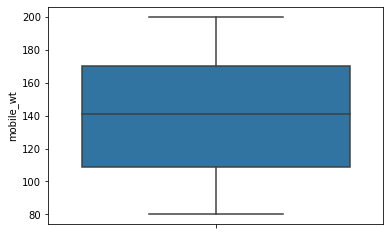

{'missing': 0,
 'min': 80,
 'max': 200,
 'mean': 140.25,
 'var': 1253.14,
 'std': 35.4,
 'range': 120,
 'q1': 109.0,
 'q2': 141.0,
 'q3': 170.0,
 'skewness': 0.01,
 'kurtosis': -1.21}

In [20]:
univariate_num(data=df,x="mobile_wt")

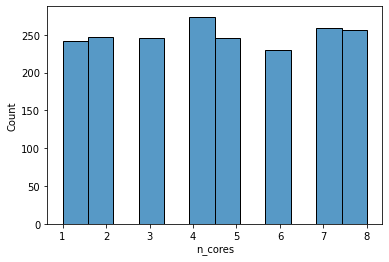

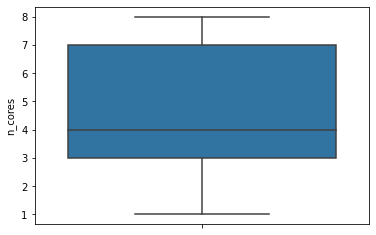

{'missing': 0,
 'min': 1,
 'max': 8,
 'mean': 4.52,
 'var': 5.23,
 'std': 2.29,
 'range': 7,
 'q1': 3.0,
 'q2': 4.0,
 'q3': 7.0,
 'skewness': 0.0,
 'kurtosis': -1.23}

In [21]:
univariate_num(data=df,x="n_cores")

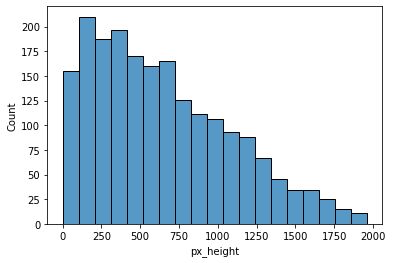

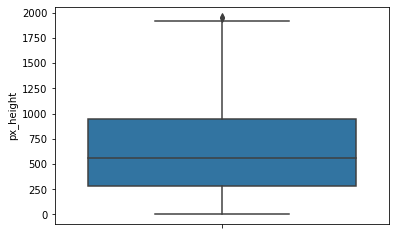

{'missing': 0,
 'min': 0,
 'max': 1960,
 'mean': 645.11,
 'var': 196941.41,
 'std': 443.78,
 'range': 1960,
 'q1': 282.75,
 'q2': 564.0,
 'q3': 947.25,
 'skewness': 0.67,
 'kurtosis': -0.32}

In [22]:
univariate_num(data=df,x="px_height")

In [23]:
df[df["px_height"]==0]

battery_power  clock_speed  fc  int_memory  m_dep  mobile_wt  n_cores  \
1481           1834          2.1   7          40    0.1         99        4   
1933            897          2.0   3           2    0.6        154        8   

      pc  px_height  px_width   ram  sc_h  sc_w  talk_time  price_range  
1481  11          0      1987  3692    13     0         16            3  
1933  10          0       994  1958     7     5          7            1

* there are 2 rows where px_height is 0 so we have to remove it

In [24]:
df1=df[df["px_height"]!=0]

* removed both rows where px_height were 0

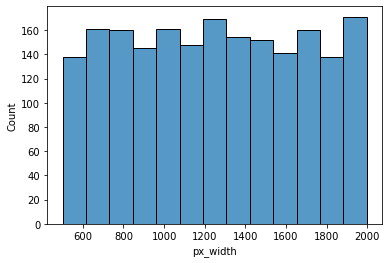

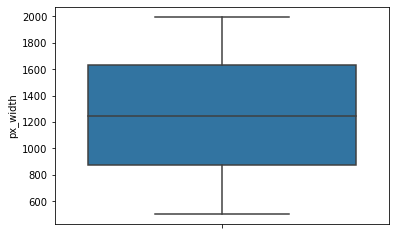

{'missing': 0,
 'min': 500,
 'max': 1998,
 'mean': 1251.28,
 'var': 186679.3,
 'std': 432.06,
 'range': 1498,
 'q1': 874.25,
 'q2': 1247.0,
 'q3': 1632.75,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [25]:
univariate_num(data=df1,x="px_width")

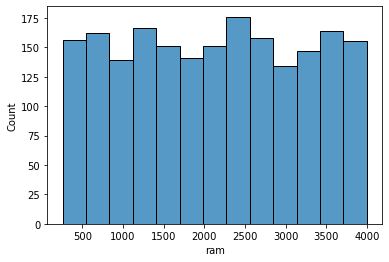

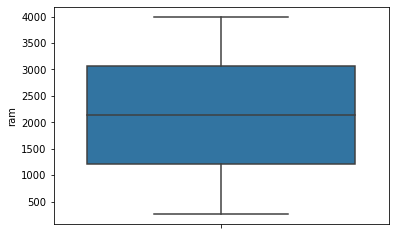

{'missing': 0,
 'min': 256,
 'max': 3998,
 'mean': 2124.21,
 'var': 1176643.61,
 'std': 1084.73,
 'range': 3742,
 'q1': 1207.5,
 'q2': 2146.5,
 'q3': 3064.5,
 'skewness': 0.01,
 'kurtosis': -1.19}

In [26]:
univariate_num(data=df,x="ram")

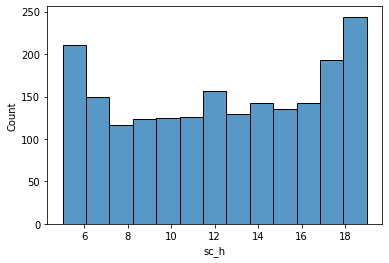

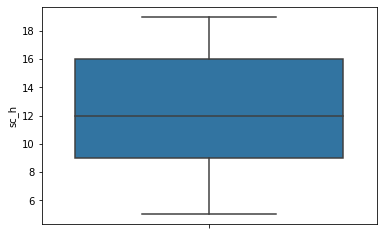

{'missing': 0,
 'min': 5,
 'max': 19,
 'mean': 12.31,
 'var': 17.75,
 'std': 4.21,
 'range': 14,
 'q1': 9.0,
 'q2': 12.0,
 'q3': 16.0,
 'skewness': -0.1,
 'kurtosis': -1.19}

In [27]:
univariate_num(data=df1,x="sc_h")

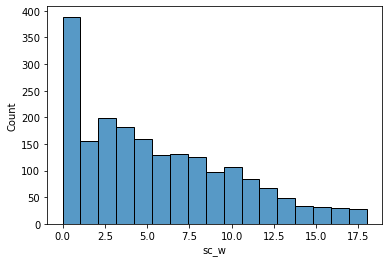

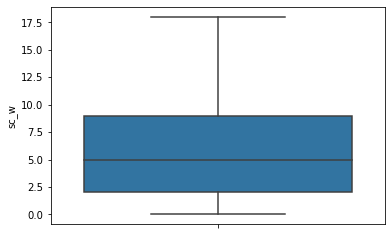

{'missing': 0,
 'min': 0,
 'max': 18,
 'mean': 5.77,
 'var': 18.98,
 'std': 4.36,
 'range': 18,
 'q1': 2.0,
 'q2': 5.0,
 'q3': 9.0,
 'skewness': 0.63,
 'kurtosis': -0.39}

In [28]:
univariate_num(data=df1,x="sc_w")

In [29]:
df1[df1["sc_w"]==0].count()

battery_power    179
clock_speed      179
fc               179
int_memory       179
m_dep            179
mobile_wt        179
n_cores          179
pc               179
px_height        179
px_width         179
ram              179
sc_h             179
sc_w             179
talk_time        179
price_range      179
dtype: int64

* there are 179 rows wich have 0 value we have to treat them

In [30]:
df1["sc_w"]=df1["sc_w"].replace([0],np.nan)
df1.fillna(value=df1['sc_w'].mean(), inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10972\75719241.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["sc_w"]=df1["sc_w"].replace([0],np.nan)
C:\Users\User\AppData\Local\Temp\ipykernel_10972\75719241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.fillna(value=df1['sc_w'].mean(), inplace=True)


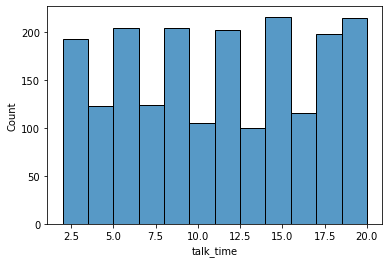

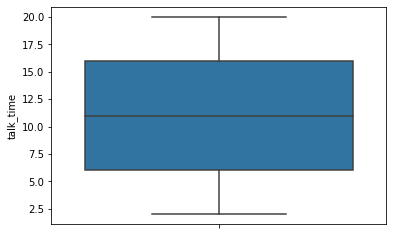

{'missing': 0,
 'min': 2,
 'max': 20,
 'mean': 11.01,
 'var': 29.85,
 'std': 5.46,
 'range': 18,
 'q1': 6.0,
 'q2': 11.0,
 'q3': 16.0,
 'skewness': 0.01,
 'kurtosis': -1.22}

In [31]:
univariate_num(data=df,x="talk_time")

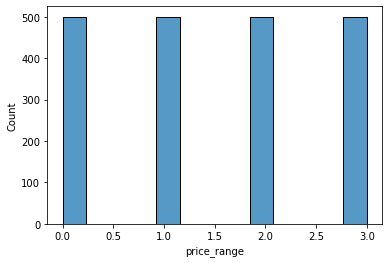

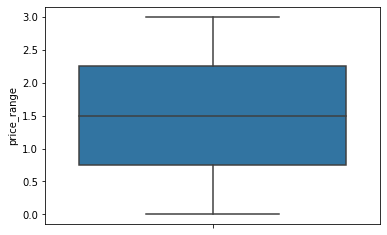

{'missing': 0,
 'min': 0,
 'max': 3,
 'mean': 1.5,
 'var': 1.25,
 'std': 1.12,
 'range': 3,
 'q1': 0.75,
 'q2': 1.5,
 'q3': 2.25,
 'skewness': 0.0,
 'kurtosis': -1.36}

In [32]:
univariate_num(data=df,x='price_range')

### bivariate analysis

In [33]:
# cat-cat

In [34]:
pd.crosstab(df1["n_cores"],df1["price_range"])

price_range   0   1   2   3
n_cores                    
1            49  76  52  65
2            69  59  57  62
3            62  69  56  59
4            67  76  73  57
5            59  51  66  70
6            61  54  57  58
7            66  55  69  69
8            67  59  70  59

In [35]:
pd.crosstab(df1["m_dep"],df1["price_range"])

price_range   0   1   2   3
m_dep                      
0.1          87  61  82  89
0.2          48  61  55  49
0.3          60  46  56  37
0.4          42  38  41  47
0.5          49  58  46  52
0.6          38  52  51  44
0.7          54  46  51  49
0.8          49  52  51  56
0.9          53  49  41  52
1.0          20  36  26  24

In [36]:
# cat-num

In [37]:
df1.groupby(["price_range"]).agg({"battery_power":["min","max","mean","var"]})

battery_power                                  
                      min   max         mean            var
price_range                                                
0                     503  1994  1116.902000  168757.711820
1                     501  1996  1229.533066  192547.414065
2                     501  1998  1228.320000  205084.955511
3                     503  1994  1379.074148  172149.651117

In [38]:
df1.groupby(["price_range"]).agg({"clock_speed":["min","max","mean","var"]})

clock_speed                         
                    min  max      mean       var
price_range                                     
0                   0.5  3.0  1.550200  0.720701
1                   0.5  3.0  1.487575  0.664183
2                   0.5  3.0  1.529800  0.647066
3                   0.5  3.0  1.519238  0.634930

In [39]:
df1.groupby(["price_range"]).agg({"fc":["min","max","mean","var"]})

fc                         
            min max      mean        var
price_range                             
0             0  19  4.084000  17.503952
1             0  18  4.342685  20.281929
2             0  18  4.498000  18.899796
3             0  18  4.310621  18.792879

In [40]:
df1.groupby(["price_range"]).agg({"int_memory":["min","max","mean","var"]})

int_memory                           
                   min max       mean         var
price_range                                      
0                    2  64  31.174000  327.647018
1                    2  64  32.176353  322.852371
2                    2  64  30.920000  340.105812
3                    2  64  33.963928  322.070985

In [41]:
df1.groupby(["price_range"]).agg({"int_memory": [min, max, np.mean]})

int_memory               
                   min max       mean
price_range                          
0                    2  64  31.174000
1                    2  64  32.176353
2                    2  64  30.920000
3                    2  64  33.963928

In [42]:
df1.groupby(["price_range"]).agg({"mobile_wt": [min, max, np.mean,np.median]})

mobile_wt                        
                  min  max        mean median
price_range                                  
0                  80  200  140.552000  142.0
1                  80  200  140.482966  141.0
2                  80  200  143.614000  145.0
3                  80  200  136.394790  134.0

In [43]:
df1.groupby(["price_range"]).agg({"pc": [min, max, np.mean,np.median]})

pc                      
            min max       mean median
price_range                          
0             0  20   9.574000    9.5
1             0  20   9.923848   10.0
2             0  20  10.018000   10.0
3             0  20  10.148297   10.0

In [44]:
df1.groupby(["price_range"]).agg({"px_height": [min, max, np.mean,np.median]})

px_height                         
                  min   max        mean median
price_range                                   
0                   1  1878  536.408000  465.5
1                   2  1914  668.228457  607.0
2                  10  1960  632.284000  538.5
3                   4  1949  746.340681  674.0

In [45]:
df1.groupby(["price_range"]).agg({"talk_time": [min, max, np.mean,np.median]})

talk_time                      
                  min max       mean median
price_range                                
0                   2  20  10.612000   10.0
1                   2  20  11.370741   12.0
2                   2  20  10.972000   11.0
3                   2  20  11.088176   11.0

In [46]:
df1.groupby(["price_range"]).agg({"px_width": [min, max, np.mean,np.median]})

px_width                           
                 min   max         mean  median
price_range                                    
0                500  1989  1150.270000  1132.5
1                500  1998  1252.424850  1224.0
2                508  1997  1234.046000  1221.5
3                501  1995  1368.601202  1415.0

In [47]:
df1.groupby(["price_range"]).agg({"ram": [min, max, np.mean,np.median]})

ram                           
              min   max         mean  median
price_range                                 
0             256  1974   785.314000   719.5
1             387  2811  1678.931864  1686.0
2            1185  3916  2582.816000  2577.0
3            2259  3998  3448.745491  3508.0

In [48]:
df1.groupby(["price_range"]).agg({"sc_h": [min, max, np.mean,np.median]})

sc_h                      
             min max       mean median
price_range                           
0              5  19  12.324000   12.0
1              5  19  12.222445   12.0
2              5  19  12.010000   12.0
3              5  19  12.679359   13.0

In [49]:
df1.groupby(["price_range"]).agg({"sc_w": [min, max, np.mean,np.median]})

sc_w                          
             min   max      mean    median
price_range                               
0            1.0  18.0  6.303134  6.000000
1            1.0  18.0  6.154767  6.000000
2            1.0  17.0  6.271753  6.000000
3            1.0  18.0  6.622941  6.338098

In [50]:
dp=df1[df1["price_range"]==1]
ndp=df1[df1["price_range"]==0]

In [51]:
from scipy import stats
stats.ttest_ind(dp["fc"],ndp["fc"])

Ttest_indResult(statistic=0.9405689403009954, pvalue=0.3471536308192571)

In [52]:
stats.ttest_ind(dp["pc"],ndp["pc"])

Ttest_indResult(statistic=0.9043774572153708, pvalue=0.36601376084136517)

In [53]:
stats.ttest_ind(dp["sc_w"],ndp["sc_w"])

Ttest_indResult(statistic=-0.6196486058892547, pvalue=0.5356307389765436)

In [54]:
stats.ttest_ind(dp["sc_h"],ndp["sc_h"])

Ttest_indResult(statistic=-0.38069066834343235, pvalue=0.7035138906394303)

In [55]:
stats.ttest_ind(dp["ram"],ndp["ram"])

Ttest_indResult(statistic=33.8166156635565, pvalue=1.3167718643841273e-167)

In [56]:
stats.ttest_ind(dp["talk_time"],ndp["talk_time"])

Ttest_indResult(statistic=2.185873647408959, pvalue=0.029056852752430036)

In [57]:
# num-num

<AxesSubplot:xlabel='battery_power', ylabel='clock_speed'>

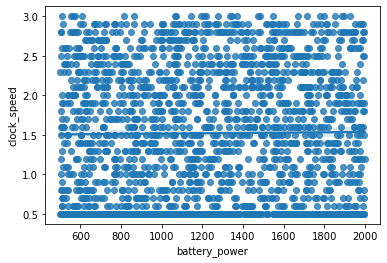

In [58]:
sns.regplot(data=df1,x="battery_power",y="clock_speed")

In [59]:
df1.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

<AxesSubplot:xlabel='mobile_wt', ylabel='battery_power'>

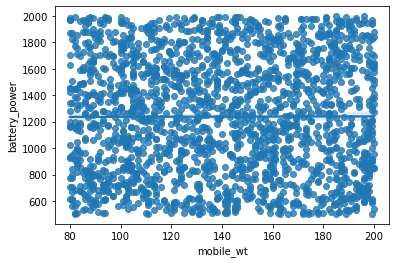

In [60]:
sns.regplot(data=df1,x="mobile_wt",y="battery_power")

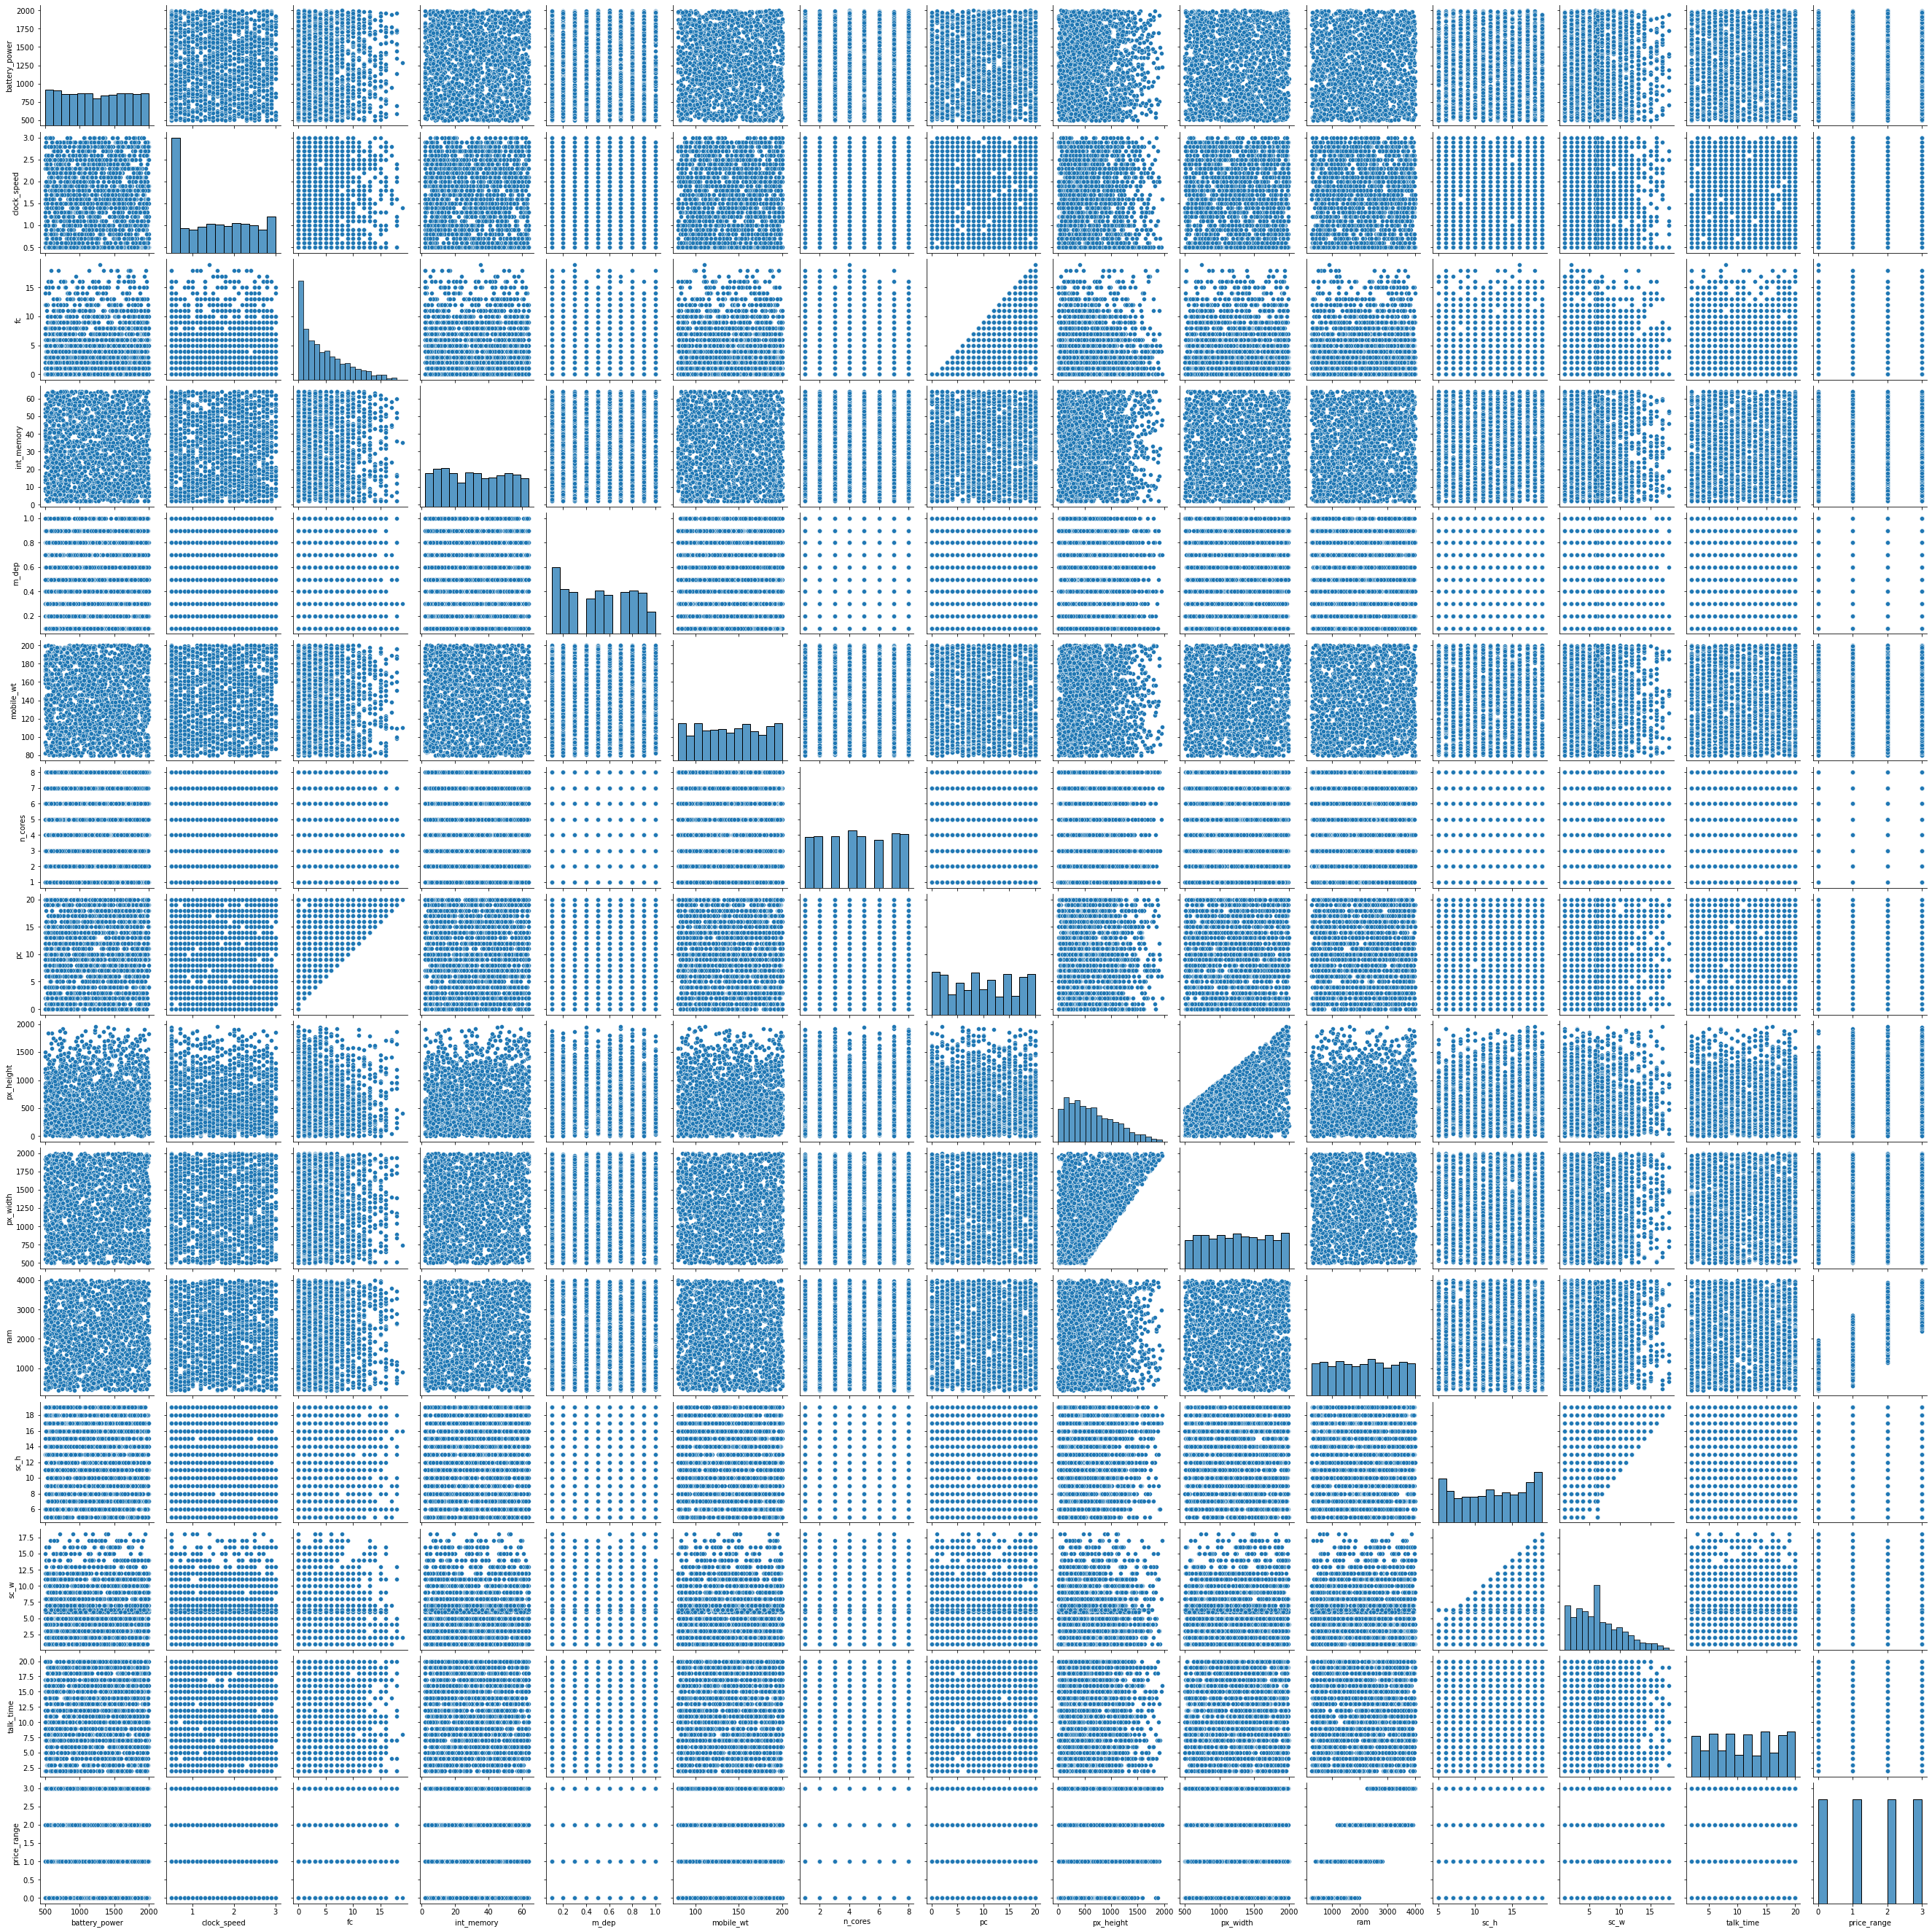

In [61]:
sns.pairplot(data=df1)

### missing values

In [62]:
df1.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

### outlier treatment

In [63]:
df1.describe(percentiles=[.01,.02,.05,.06,.09,.1,.25,.5,.75,.9,.96,.97,.98,.99]).T

count         mean          std    min      1%      2%  \
battery_power  1998.0  1238.391391   439.369721  501.0  510.00  524.88   
clock_speed    1998.0     1.521722     0.816240    0.5    0.50    0.50   
fc             1998.0     4.308809     4.343101    0.0    0.00    0.00   
int_memory     1998.0    32.057558    18.141468    2.0    2.00    2.00   
m_dep          1998.0     0.501902     0.288411    0.1    0.10    0.10   
mobile_wt      1998.0   140.262763    35.404007   80.0   80.00   82.00   
n_cores        1998.0     4.519019     2.287627    1.0    1.00    1.00   
pc             1998.0     9.915916     6.067302    0.0    0.00    0.00   
px_height      1998.0   645.753754   443.532906    1.0   17.97   34.82   
px_width       1998.0  1251.276276   432.064000  500.0  512.97  526.88   
ram            1998.0  2123.511512  1084.701280  256.0  296.97  323.94   
sc_h           1998.0    12.308809     4.213652    5.0    5.00    5.00   
sc_w           1998.0     6.338098     3.962586    1.0    1.00    1.00   
talk_time      1998.0    11.010511     5.464813    2.0    2.00    2.00   
price_range    1998.0     1.499499     1.118314    0.0    0.00    0.00   

                   5%      6%      9%    10%      25%     50%      75%  \
battery_power  570.85  583.82  618.00  634.7   851.25  1226.0  1615.00   
clock_speed      0.50    0.50    0.50    0.5     0.70     1.5     2.20   
fc               0.00    0.00    0.00    0.0     1.00     3.0     7.00   
int_memory       5.00    5.00    7.00    8.0    16.00    32.0    48.00   
m_dep            0.10    0.10    0.10    0.1     0.20     0.5     0.80   
mobile_wt       86.00   87.00   89.00   91.0   109.00   141.0   170.00   
n_cores          1.00    1.00    1.00    1.0     3.00     4.0     7.00   
pc               0.00    1.00    1.00    1.0     5.00    10.0    15.00   
px_height       72.70   83.82  117.00  126.0   284.00   565.5   947.75   
px_width       579.55  592.82  647.73  661.7   874.25  1247.0  1632.75   
ram            445.00  470.82  586.00  605.4  1206.50  2146.5  3063.75   
sc_h             6.00    6.00    6.00    6.0     9.00    12.0    16.00   
sc_w             1.00    1.00    1.00    1.0     3.00     6.0     9.00   
talk_time        3.00    3.00    3.00    4.0     6.00    11.0    16.00   
price_range      0.00    0.00    0.00    0.0     0.25     1.5     2.00   

                  90%      96%      97%      98%      99%     max  
battery_power  1851.0  1946.24  1961.18  1974.00  1987.00  1998.0  
clock_speed       2.7     2.90     2.90     2.90     3.00     3.0  
fc               11.0    14.00    15.00    16.00    16.00    19.0  
int_memory       57.0    62.00    63.00    63.00    64.00    64.0  
m_dep             0.9     1.00     1.00     1.00     1.00     1.0  
mobile_wt       189.0   197.00   198.00   199.00   199.00   200.0  
n_cores           8.0     8.00     8.00     8.00     8.00     8.0  
pc               18.0    20.00    20.00    20.00    20.00    20.0  
px_height      1285.0  1568.12  1618.09  1698.00  1791.03  1960.0  
px_width       1854.0  1945.24  1963.00  1973.06  1986.03  1998.0  
ram            3635.6  3864.12  3894.27  3922.18  3958.03  3998.0  
sc_h             18.0    19.00    19.00    19.00    19.00    19.0  
sc_w             12.0    15.00    15.00    16.00    17.00    18.0  
talk_time        19.0    20.00    20.00    20.00    20.00    20.0  
price_range       3.0     3.00     3.00     3.00     3.00     3.0

* there is outlier in fc column

In [64]:
def Outlier_tuck(data, x):
    q1=data[x].quantile(.25)
    q3=data[x].quantile(.75)
    lower_cap=q1-1.5*(q3-q1)
    upper_cap=q3+1.5*(q3-q1)
    data[x]=np.where(data[x]>=upper_cap, upper_cap,data[x])
    data[x]=np.where(data[x]<=lower_cap, lower_cap,data[x])
    return 

In [65]:
 Outlier_tuck(data=df1, x='fc')

C:\Users\User\AppData\Local\Temp\ipykernel_10972\1818138890.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x]=np.where(data[x]>=upper_cap, upper_cap,data[x])
C:\Users\User\AppData\Local\Temp\ipykernel_10972\1818138890.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[x]=np.where(data[x]<=lower_cap, lower_cap,data[x])


* now 0 missing value and 0 outlier

### Multicollinearility

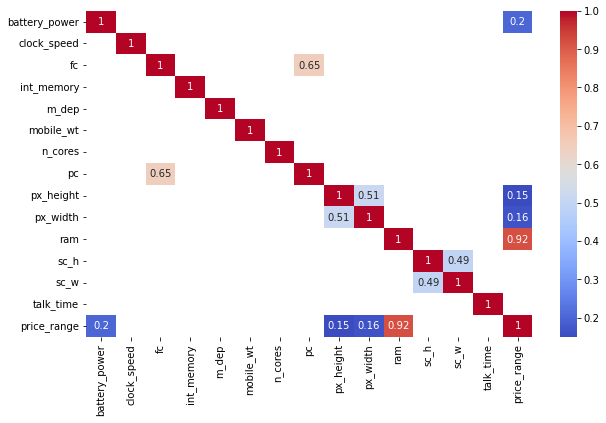

In [66]:
df2=df1.corr()
df3=df2[abs(df2)>.10]
plt.figure(figsize=(10,6))
sns.heatmap(df3, annot=True, cmap="coolwarm")
plt.show()  

### knn

In [67]:
y=df1["price_range"]
x=df1.drop(["price_range"],axis=1)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=88)

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn1=KNeighborsClassifier()
knn1.fit(x_train,y_train)

KNeighborsClassifier()

In [71]:
print("train accuracy", knn1.score(x_train,y_train))
print("test accuracy", knn1.score(x_test,y_test))

train accuracy 0.9513590844062947
test accuracy 0.925


In [1]:
# k1=[3,5,7,9,11,13,15,17,19,21]
# p=[1,2,3]
# train=[]
# test=[]
# for i in k1:
#     knn2=KNeighborsClassifier(n_neighbors=i)
#     knn2.fit(x_train,y_train)
#     train_ac=knn2.score(x_train,y_train)
#     test_ac=knn2.score(x_test,y_test)
#     train.append(train_ac)
#     test.append(test_ac)
#     print(f"for k={i} train accuracy={train_ac} and test accuracy={test_ac}")

In [2]:
# plt.figure(figsize=(12,6))
# plt.plot(k1,train, label="train accuracy", color="r")
# plt.plot(k1,test, label="test accuracy", color="b")
# plt.title("comparision between train and test accuracy for diffrent ks")
# plt.xlabel("accuracy")
# plt.ylabel("neighbors")
# plt.legend()
# plt.xticks(rotation=45)
# plt.show()

In [74]:
k1=[3,5,7,9,11,13,15,17,19,21]
p=[1,2,3]
train=[]
test=[]
for i in k1:
    for j in p:
        knn2=KNeighborsClassifier(n_neighbors=i)
        knn2.fit(x_train,y_train)
        train_ac=knn2.score(x_train,y_train)
        test_ac=knn2.score(x_test,y_test)
        train.append(train_ac)
        test.append(test_ac)
        print(f"for k={i} and p={j}, train accuracy={train_ac} and test accuracy={test_ac}")

for k=3 and p=1, train accuracy=0.9606580829756796 and test accuracy=0.915
for k=3 and p=2, train accuracy=0.9606580829756796 and test accuracy=0.915
for k=3 and p=3, train accuracy=0.9606580829756796 and test accuracy=0.915
for k=5 and p=1, train accuracy=0.9513590844062947 and test accuracy=0.925
for k=5 and p=2, train accuracy=0.9513590844062947 and test accuracy=0.925
for k=5 and p=3, train accuracy=0.9513590844062947 and test accuracy=0.925
for k=7 and p=1, train accuracy=0.9513590844062947 and test accuracy=0.9333333333333333
for k=7 and p=2, train accuracy=0.9513590844062947 and test accuracy=0.9333333333333333
for k=7 and p=3, train accuracy=0.9513590844062947 and test accuracy=0.9333333333333333
for k=9 and p=1, train accuracy=0.9513590844062947 and test accuracy=0.9383333333333334
for k=9 and p=2, train accuracy=0.9513590844062947 and test accuracy=0.9383333333333334
for k=9 and p=3, train accuracy=0.9513590844062947 and test accuracy=0.9383333333333334
for k=11 and p=1, trai

from above graph, we can conclude that at k=13 the difference between accuracles is min 

In [75]:
# v

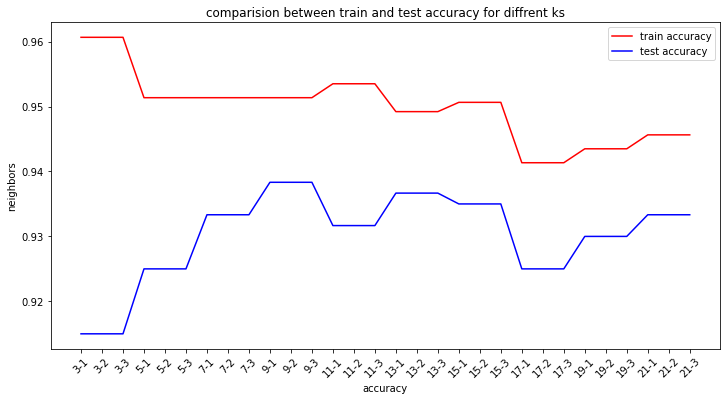

In [76]:
plt.figure(figsize=(12,6))
plt.plot(dfg,train, label="train accuracy", color="r")
plt.plot(dfg,test, label="test accuracy", color="b")
plt.title("comparision between train and test accuracy for diffrent ks")
plt.xlabel("accuracy")
plt.ylabel("neighbors")
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [77]:
knn2=KNeighborsClassifier(n_neighbors=13,p=3)
knn2.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=13, p=3)

In [78]:
print("train score", knn2.score(x_train,y_train))
print("test score", knn2.score(x_test,y_test))

train score 0.9484978540772532
test score 0.935


In [79]:
pred_train=knn2.predict(x_train)
pred_test=knn2.predict(x_test)

prob_train=knn2.predict_proba(x_train)[:,1]
prob_test=knn2.predict_proba(x_test)[:,1]

In [80]:
cm=metrics.confusion_matrix(y_train,pred_train)
pd.DataFrame(cm, columns=["pred_low","pred_median", "pred_high","pred_veryhigh"],
            index=["act_low","act_median","act_high","act_veryhigh"])

pred_low  pred_median  pred_high  pred_veryhigh
act_low            331            5          0              0
act_median          13          327          8              0
act_high             0           13        327              9
act_veryhigh         0            0         24            341

In [81]:
cm=metrics.confusion_matrix(y_test,pred_test)
pd.DataFrame(cm, columns=["pred_low","pred_median", "pred_high","pred_veryhigh"],
            index=["act_low","act_median","act_high","act_veryhigh"])

pred_low  pred_median  pred_high  pred_veryhigh
act_low            162            2          0              0
act_median           7          136          8              0
act_high             0           10        135              6
act_veryhigh         0            0          6            128

In [82]:
print(metrics.classification_report(y_train, pred_train))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       336
           1       0.95      0.94      0.94       348
           2       0.91      0.94      0.92       349
           3       0.97      0.93      0.95       365

    accuracy                           0.95      1398
   macro avg       0.95      0.95      0.95      1398
weighted avg       0.95      0.95      0.95      1398



In [83]:
print(metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       164
           1       0.92      0.90      0.91       151
           2       0.91      0.89      0.90       151
           3       0.96      0.96      0.96       134

    accuracy                           0.94       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.93      0.94      0.93       600

